# Week 3 - Distribution and Correlation Plots

## Contents
1. [Ridgeline plots](#1)
2. [Raincloud plots](#2)
3. [Scatter plots](#3)
4. [Bubble plots](#4)

### Load packages and datasets

In [1]:
library(ggplot2)
library(ggridges)
library(datasets)
library(viridis)

library(gghalves)
library(ggpubr)
library(vegan)



The downloaded binary packages are in
	/var/folders/kg/hfdb2kyd3mv9qr1hqkrgy59r0000gn/T//RtmpuCXYf6/downloaded_packages

The downloaded binary packages are in
	/var/folders/kg/hfdb2kyd3mv9qr1hqkrgy59r0000gn/T//RtmpuCXYf6/downloaded_packages

The downloaded binary packages are in
	/var/folders/kg/hfdb2kyd3mv9qr1hqkrgy59r0000gn/T//RtmpuCXYf6/downloaded_packages

The downloaded binary packages are in
	/var/folders/kg/hfdb2kyd3mv9qr1hqkrgy59r0000gn/T//RtmpuCXYf6/downloaded_packages


Loading required package: viridisLite

Loading required package: permute

Loading required package: lattice

This is vegan 2.6-4

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: rlang



In [2]:
data(iris)
data(mtcars)

### Set theme

In [3]:
theme_set(theme_bw())

<a name = "1"></a>
### Ridgeline plots
Ridgeline plots allow us to separate density plots by categorical factors. Here we plot a ridgeline plot of Sepal.Length separated by Species. The command below has fill designated by Species just as in our prior graphs using default colors. The bandwidth option will automatically be set but if you want to pick your own you can do that by setting `bandwidth =` inside of `geom_density_ridges()`. A larger bandwidth will provide less resolution and a smaller bandwidth will set a finer resolution.

Picking joint bandwidth of 0.181



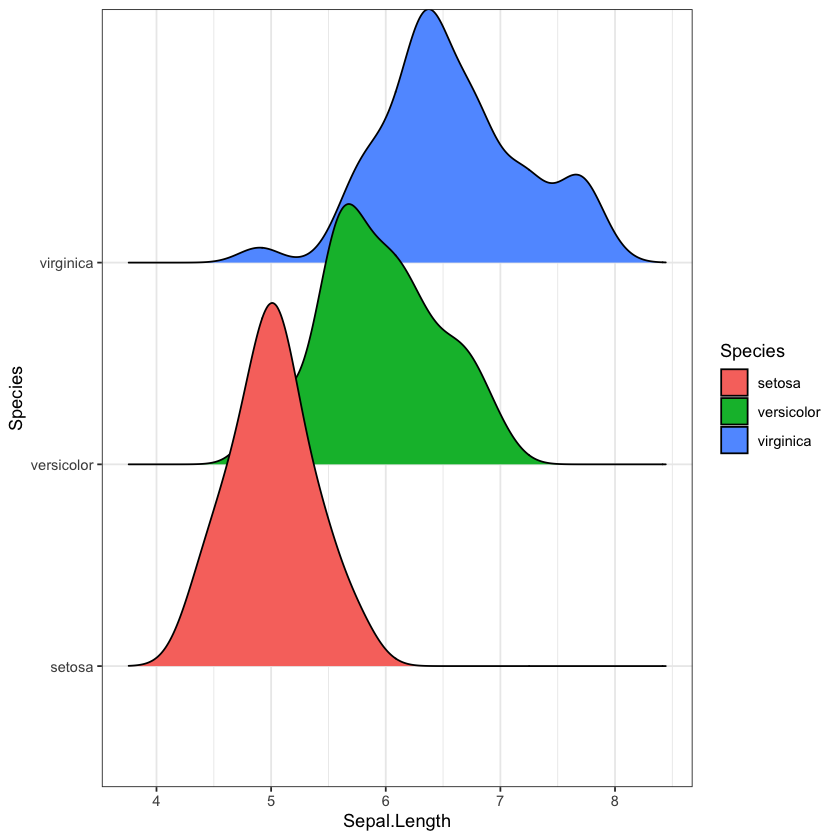

In [4]:
ggplot(iris, aes(Sepal.Length, Species, fill = Species)) + geom_density_ridges()

This next line of code sets the fill to a gradient color using the `viridis` package. The `viridis` package comes with many options for preset gradient palettes which we can change in and out using the option setting inside of `scale_fill_viridis()`. Please note that in order to use a gradient fill with a ridgeline plot you have to change `geom_density_ridges()` to `geom_density_ridges_gradient()`.

Warning message:
“The dot-dot notation (`..x..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(x)` instead.”
Picking joint bandwidth of 0.181



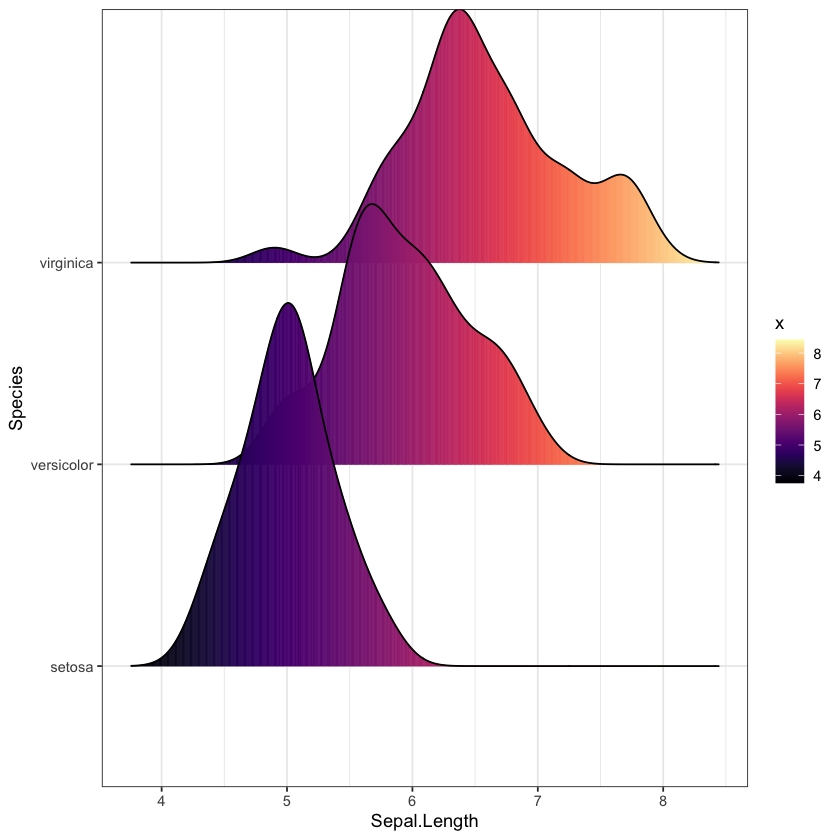

In [5]:
ggplot(iris, aes(Sepal.Length, Species, fill = ..x..)) + geom_density_ridges_gradient() + 
scale_fill_viridis(option = "A")

You can also set a custom gradient using either `scale_fill_gradient()` or `scale_fill_gradient2()`. The primary difference between these two are the number of colors you set. `scale_fill_gradient()` will only take two colors, a high and a low. `scale_fill_gradient2()` will take 3 colors, a high, low, and mid and will allow you to set a midpoint. An example of using `scale_fill_gradient2()` is given below.

Picking joint bandwidth of 0.181



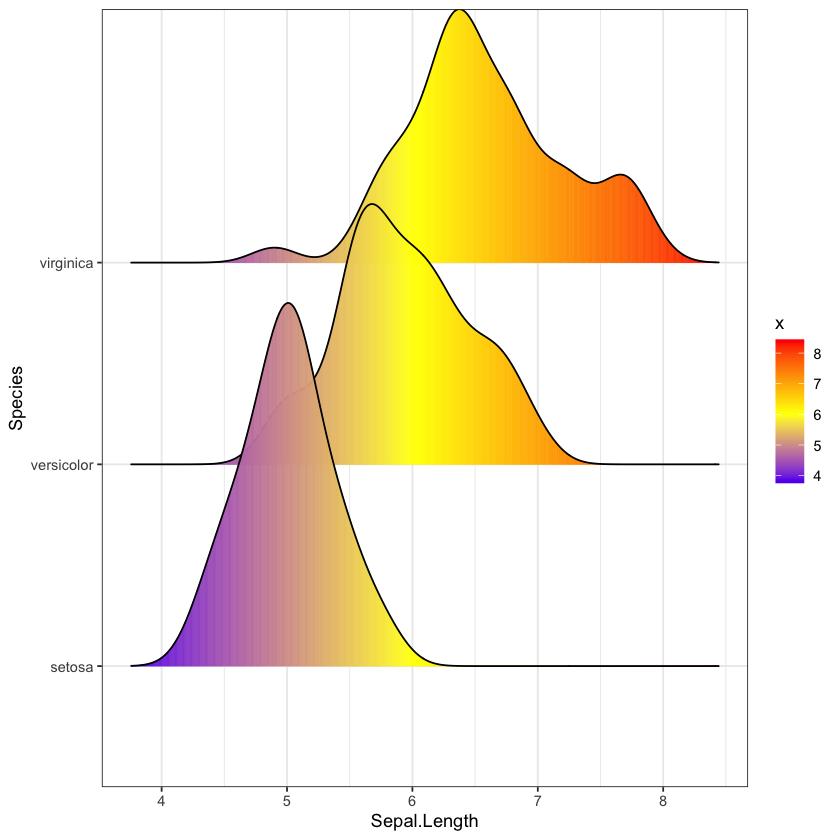

In [6]:
ggplot(iris, aes(Sepal.Length, Species, fill = ..x..)) + geom_density_ridges_gradient() + 
scale_fill_gradient2(high = "red", mid = "yellow", low = "blue", midpoint = 6)

<a name = "2"></a>
### Raincloud plots
Raincloud plots are a good way to provide statistical and distribution data in a single plot. Creating these plots involves layering multiple geoms together and adjusting the aesthetics for each. Below, we will walk through step by step the process of plotting and adjusting the appearance of a raincloud plot. 

The first command sets up the basic plot with a half violin, a box plot, and points. Because we are using multiple data layers, the only aesthetics we are going to designate in the `ggplot()` portion of the command are our x and y. The rest of our aesthetics will be designated in each individual geom later.

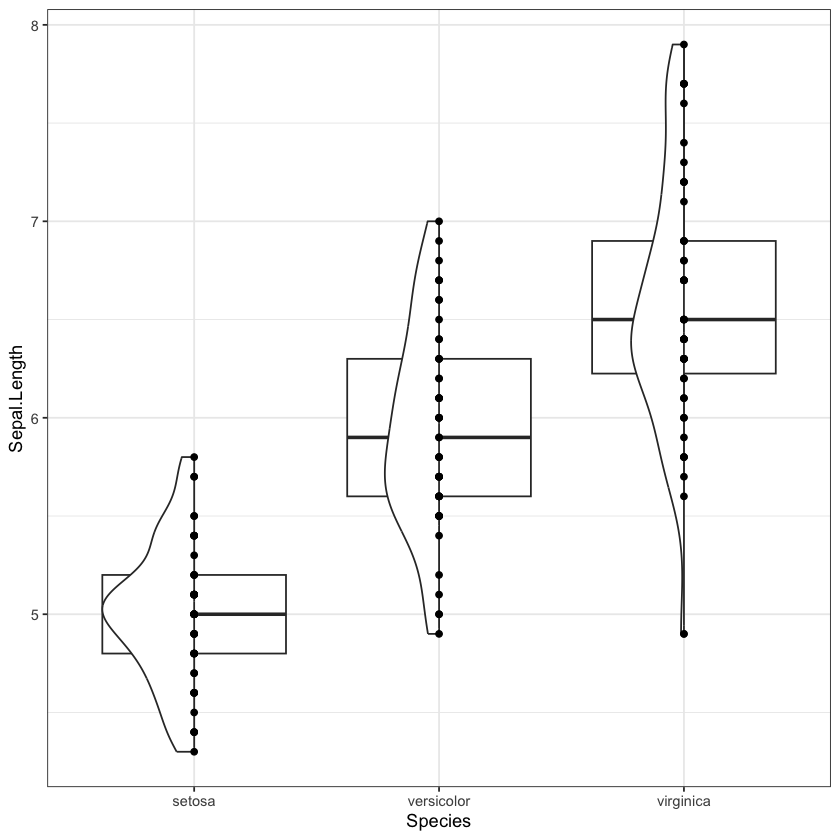

In [7]:
ggplot(iris, aes(Species, Sepal.Length)) + geom_boxplot() + geom_half_violin() + geom_point()

The next thing we are going to do is adjust the aesthetics of our box plot. First we want to narrow the width to fit within the violin, which we do using `width = 0.2` inside `geom_boxplot()`. Second we want to change the fill color to color by Species. Because we are filling by a variable we set that inside `aes()` within the `geom_boxplot()` command. 

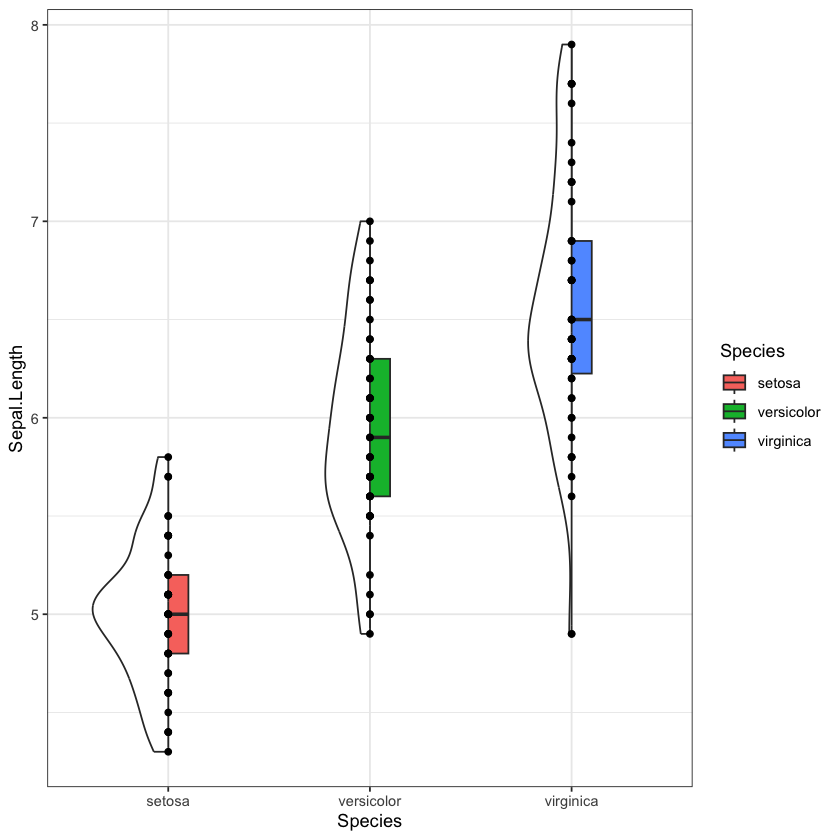

In [8]:
ggplot(iris, aes(Species, Sepal.Length)) + geom_boxplot(width = 0.2, aes(fill = Species)) + 
geom_half_violin() + geom_point()

Now let's format the half violin. The half violin is plotted second and therefore is on top of the box plot. To prevent these from overlapping we shift the position of the half violin using `position = position_nudge(x = 0.2)`. The `x = 0.2` tells ggplot to shift the half violin 0.2 units away from the center along the x axis. If you want the violin on a specific side of the boxplot we set that using `side =`. The input for this would be either "r" for right or "l" for left. Then finally, we use `fill = Species` within the `aes()` of the `geom_half_violin()` just as we did with our boxplot to color the half violin by Species using default color. 

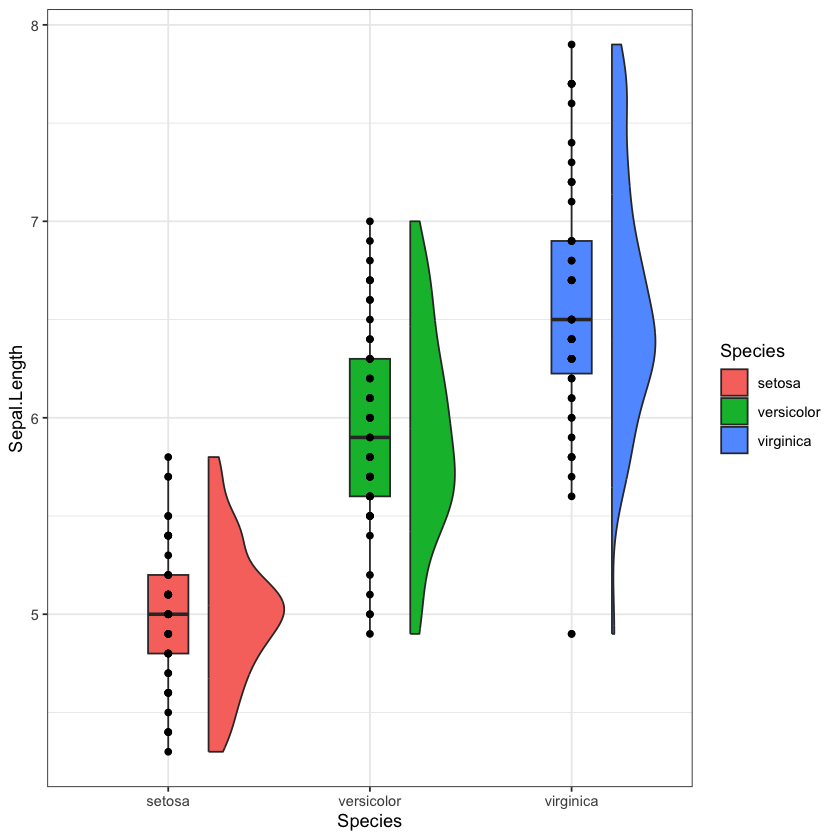

In [9]:
ggplot(iris, aes(Species, Sepal.Length)) + geom_boxplot(width = 0.2, aes(fill = Species)) + 
geom_half_violin(side = "r", position = position_nudge(x = 0.2), aes(fill = Species)) + geom_point()

Finally, we want to format our data points. Just as with the half violin, `geom_half_point()` is also an option and will help prevent the points from overlapping with your box plot. We use the same options as in the half violin, but we set the side argument to the opposite of what is set in the half violin so the appear on the other side. We again use `position_nudge()` to shift our points along the x axis and prevent overlap. `range_scale()` is used to set the width of jitter in the points in the `geom_half_point()` object, smaller numbers are more narrow, larger numbers are wider. Finally, because the default point shape is a color with no fill, we designate to color the points by Species using `color = Species` inside the `aes()` of the `geom_half_point()` command.

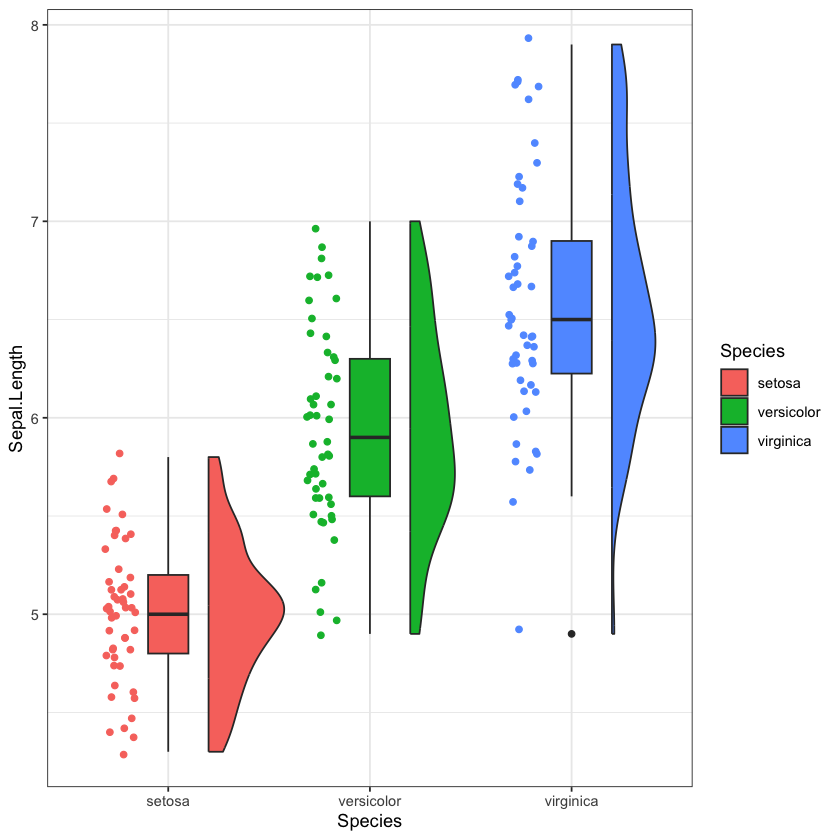

In [10]:
ggplot(iris, aes(Species, Sepal.Length)) + geom_boxplot(width = 0.2, aes(fill = Species)) + 
geom_half_violin(side = "r", position = position_nudge(x = 0.2), aes(fill = Species)) + 
geom_half_point(side = "l", position = position_nudge(x = -0.05), range_scale = 0.4, aes(color = Species))

The final step in making this plot is to rotate the axes. If we want our plot to appear with the Species along the y axis and Sepal.Length along the x, an easy way to do this is simply by adding `coord_flip()` to the end of our command.

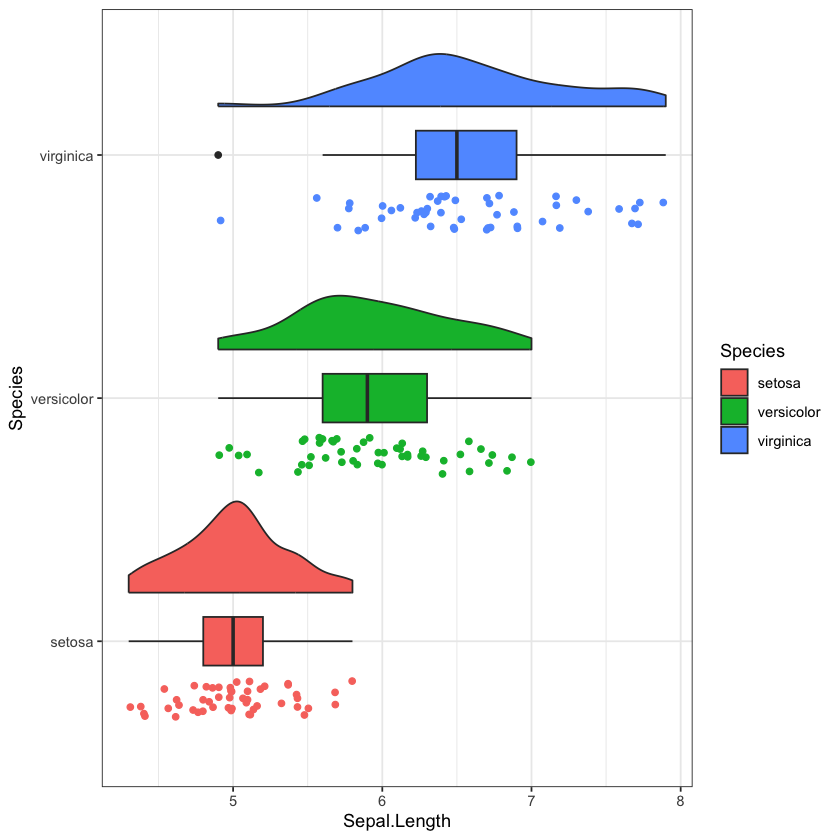

In [11]:
ggplot(iris, aes(Species, Sepal.Length)) + geom_boxplot(width = 0.2, aes(fill = Species)) + 
geom_half_violin(side = "r", position = position_nudge(x = 0.2), aes(fill = Species)) + 
geom_half_point(side = "l", position = position_nudge(x = -0.05), range_scale = 0.4, aes(color = Species)) +
coord_flip()

<a name = "3"></a>
### Scatter plots
Scatter plots can be used for a variety of data to view relationships between multiple continuous variables. For this section we are going to use the `mtcars` dataset to plot relationships between weight (wt) and miles per gallon (mpg). To start I have a `head()` command just so everyone can view the data to become familiar with it.

In [12]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


Now, we are going to plot a basic scatter plot of weight vs mpg. I set the point size here just to make the points a little easier to see.

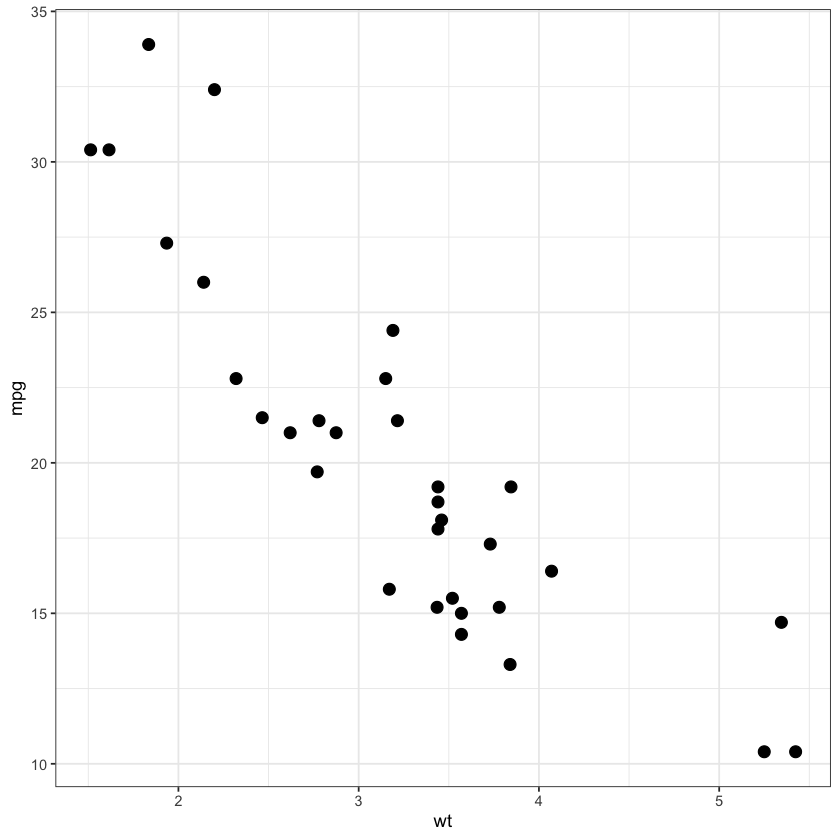

In [13]:
ggplot(mtcars, aes(wt, mpg)) + geom_point(size = 3)

The next thing to add to a scatter plot if you are interested in providing a visual of the relationship between the plotted variables is a line of best fit. This can be confusing because when you add `geom_line()` you will see not a line of best fit but instead a series of lines connecting all of you points as shown below.

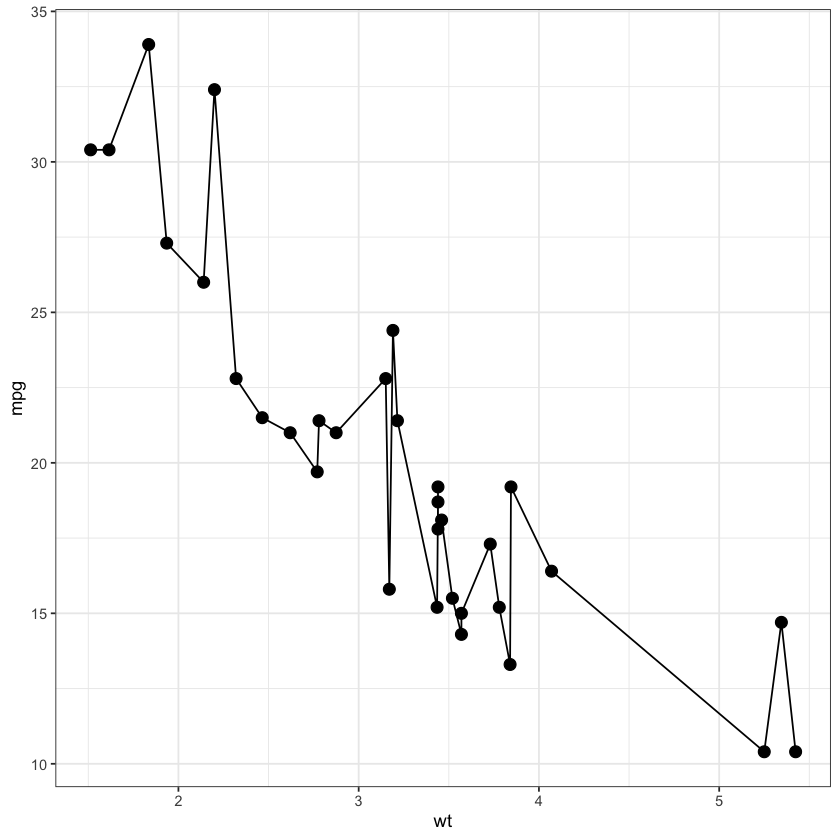

In [15]:
ggplot(mtcars, aes(wt, mpg)) + geom_point(size = 3) + geom_line()

To get a line of best fit, we instead use `geom_smooth()` and provide it with a method for fitting a line. The methods include different types of models. Most commonly used is "lm" which represents a linear model and provides a linear relationship between the two variables as shown below. The shaded area around the line shows the 95% confidence interval. 

`geom_smooth()` using formula = 'y ~ x'


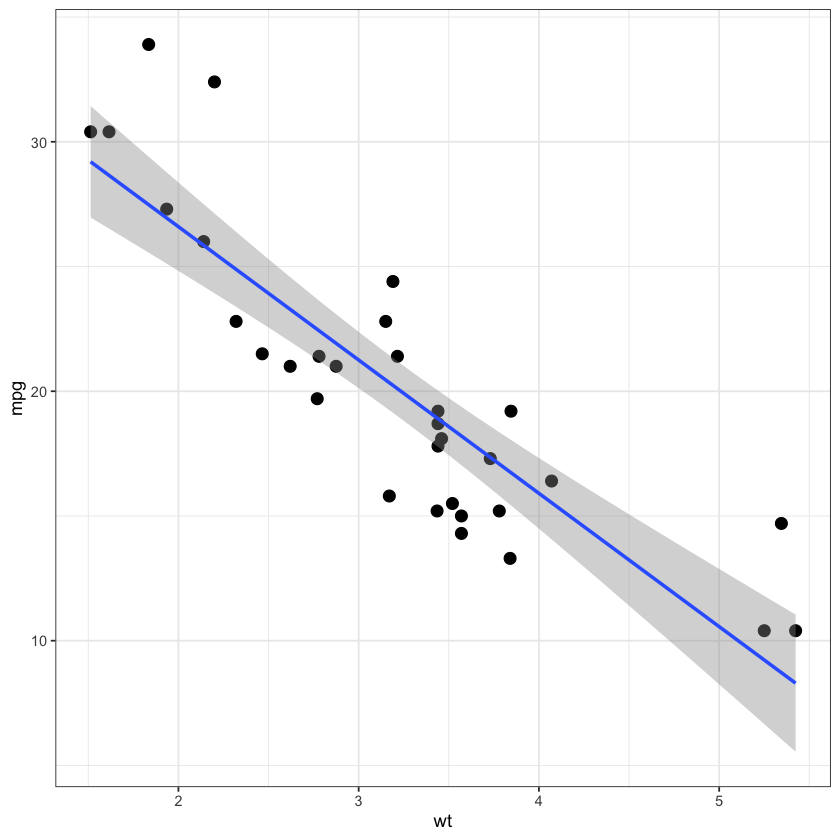

In [16]:
ggplot(mtcars, aes(wt, mpg)) + geom_point(size = 3) + geom_smooth(method = "lm")

Other model options exist including nonlinear ones. An example of this would be a generalized additive model or "gam" as shown below.

`geom_smooth()` using formula = 'y ~ s(x, bs = "cs")'


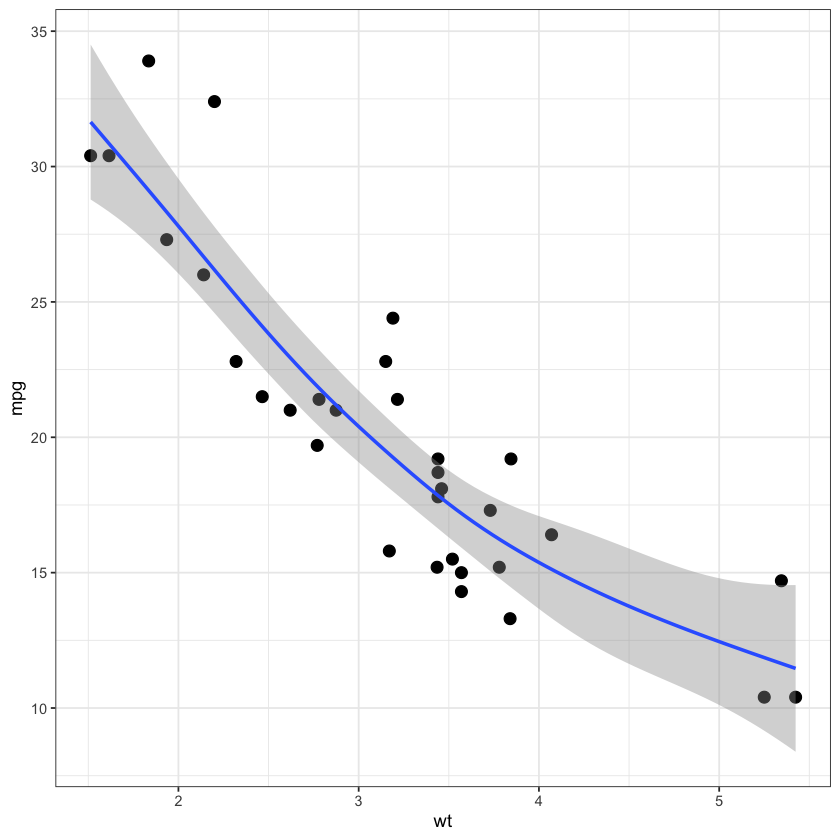

In [17]:
ggplot(mtcars, aes(wt, mpg)) + geom_point(size = 3) + geom_smooth(method = "gam")

So now, if we go back to the linear model, the next things to add to the plot are our equation of the line and our R values. To add the equation of the line, we use `stat_regline_equation()`. Inside of that command we can set the x and y coordinates for where in our plot we want that equation to appear and the size of the text that we want to use.

`geom_smooth()` using formula = 'y ~ x'


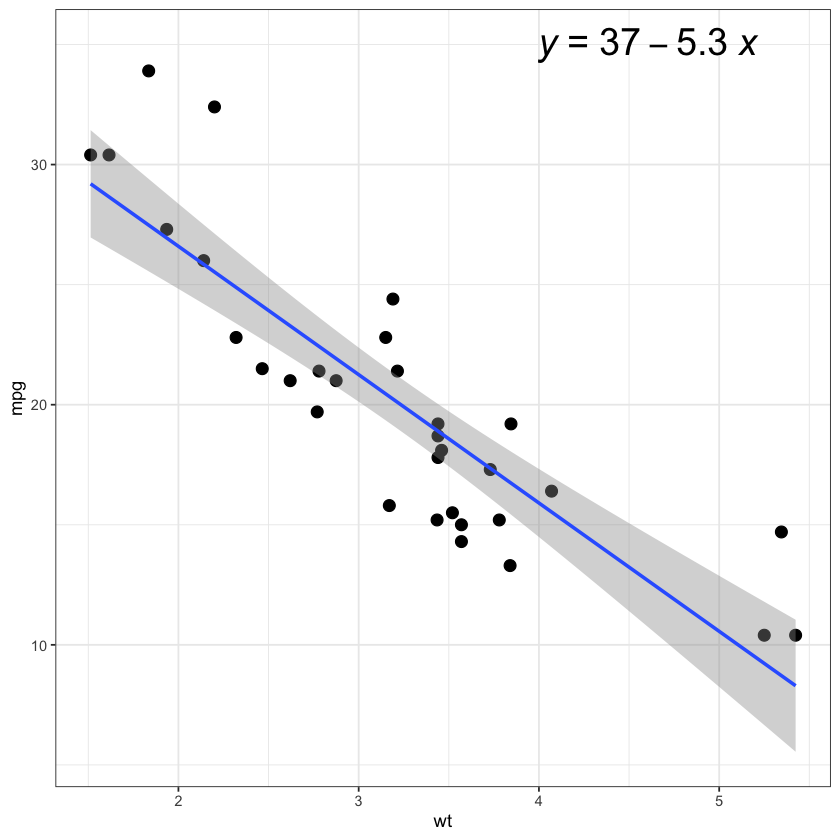

In [18]:
ggplot(mtcars, aes(wt, mpg)) + geom_point(size = 3) + geom_smooth(method = "lm") +
stat_regline_equation(size = 8, label.x = 4, label.y = 35)

To add the R value and significance of the trend we use `stat_cor()` and just as in the equation of the line, we set font size, and x and y coordinates.

`geom_smooth()` using formula = 'y ~ x'


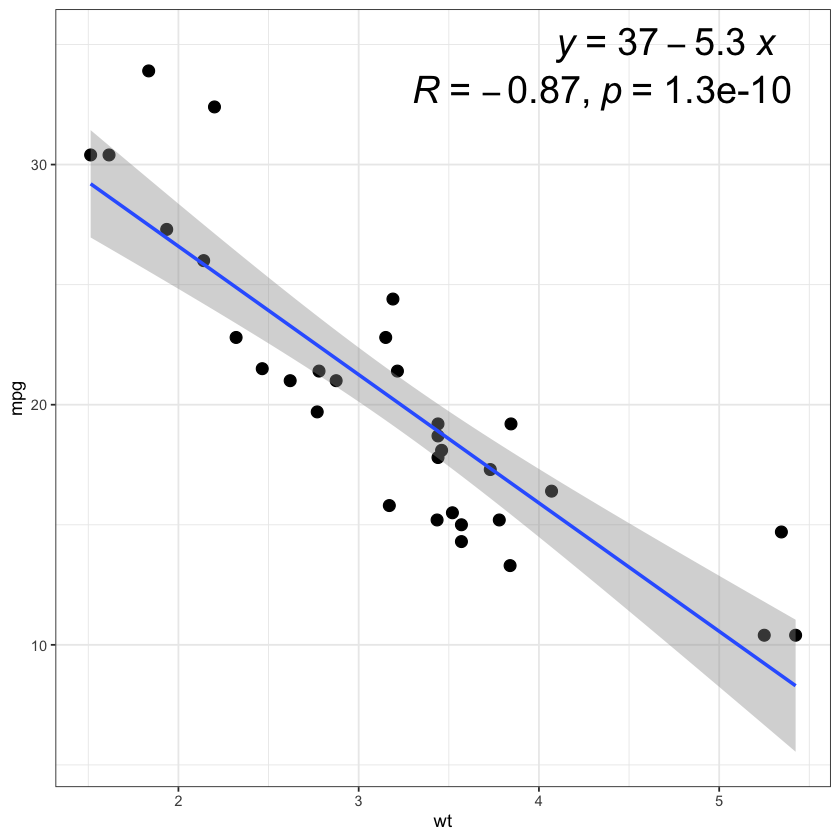

In [19]:
ggplot(mtcars, aes(wt, mpg)) + geom_point(size = 3) + geom_smooth(method = "lm") +
stat_regline_equation(size = 8, label.x = 4.1, label.y = 35) + stat_cor(size = 8, label.x = 3.3, label.y = 33)

<a name = "4"></a>
### Bubble plots
Bubble plots are useful when you have a third continous variable that you want to plot within a single graph. The way we do this is by adding size as an aesthetic variable in `geom_point()`. Below, I removed the `size = 3` from `geom_point()` and added `aes(size = hp)`. This will now vary the size of the point by the horsepower variable. Additionally I added `alpha = 0.5` to the `geom_point()` command to make the points slightly transparent and better see what points overlap.

`geom_smooth()` using formula = 'y ~ x'


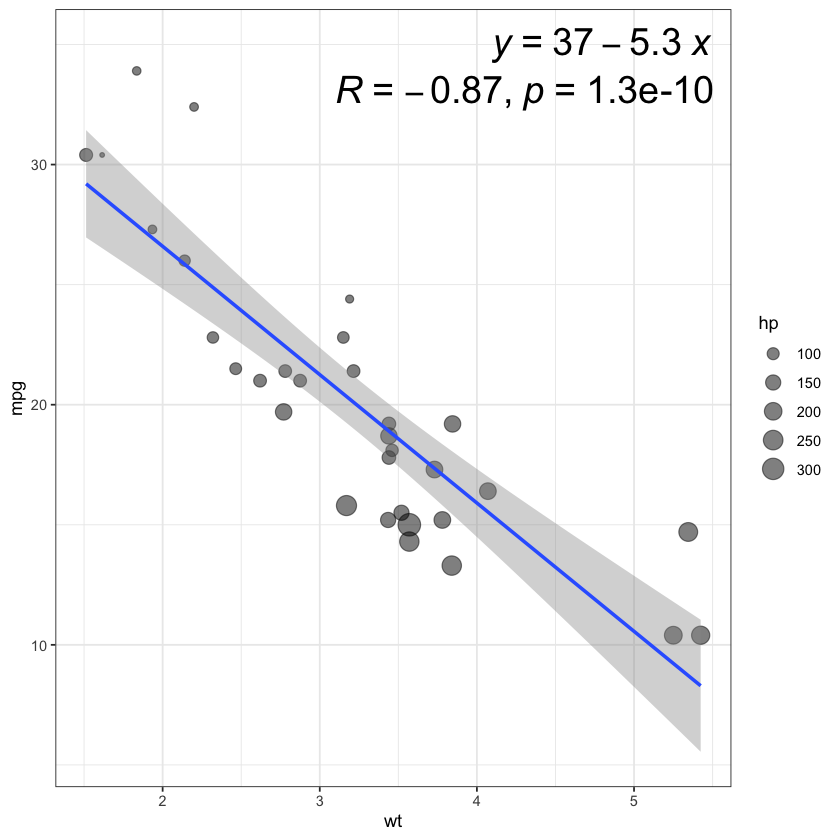

In [20]:
ggplot(mtcars, aes(wt, mpg)) + geom_point(aes(size = hp), alpha = 0.5) + geom_smooth(method = "lm") +
stat_regline_equation(size = 8, label.x = 4.1, label.y = 35) + stat_cor(size = 8, label.x = 3.1, label.y = 33)